In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data1=pd.read_excel('/content/cars_acceleration_regression_multiple - sujet.xlsx')

In [ ]:
data1

,cylinders,engine.displacement,horesepower,weight,acceleration
0,8,302.0,140,4638,16.0
1,4,79.0,67,2000,16.0
2,4,98.0,68,2135,16.6
3,4,116.0,81,2220,16.9
4,4,120.0,97,2489,15.0
...,...,...,...,...,...
225,4,135.0,84,2525,16.0
226,4,122.0,80,2451,16.5
227,4,86.0,64,1875,16.4
228,3,70.0,97,2330,13.5


In [ ]:
#declaration des x et des y
x=data1.iloc[:,:-1]
y=data1.iloc[:,-1]

In [ ]:
#split x ey y
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
#creation de modèl
model=LinearRegression().fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([15.79108702, 16.78305666, 15.2307172 , 14.83051547, 16.78825153,
       11.59384442, 16.67479405, 16.58415242, 12.80383447, 14.54577713,
       18.03968747, 13.71709114, 16.67496718, 12.28889519, 15.06257273,
       16.41636738, 15.43960885, 16.60756725, 10.40615776, 16.09596905,
       11.77362455, 16.93266632, 16.54905821, 13.76570536, 12.56547365,
       15.96134312, 15.91570016, 16.57235496, 15.55973536, 11.77622835,
       15.37030094, 17.13255344, 12.18039303, 17.14510193, 14.41591762,
       15.95853892, 14.97883543, 17.33318375, 14.99570097, 17.41168249,
       16.43543554, 17.09997486, 14.86263326, 13.40538351, 11.9868191 ,
       18.45201188])

In [ ]:
#calcul de cost
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
print("le score de la régression multiple est ",score)

le score de la régression multiple est  0.2787694462268785


In [ ]:
#test des nouveau valeurs

x2=[[1,79,58,1825]]
y=model.predict(x2)
y

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.64335461])

In [ ]:
#solution pour regression linear simple avec colone horesepower

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Création du modèle
model5 = LinearRegression()

# Entraînement du modèle avec la colonne "horsepower"
model5.fit(x_train[["horesepower"]], y_train)

# Prédiction sur les données de test
ypred_linear_horsepower = model5.predict(x_test[["horesepower"]])

# Calcul du score R2
score4 = r2_score(y_test, ypred_linear_horsepower)
print("Le score est", score4)


Le score est 0.42082941775732485


In [ ]:
#solution polymial pour x-train avec le colone horesepower

from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(degree=9)
p_horesepower_train = poly1.fit_transform(x_train[["horesepower"]])
p_horesepower_test = poly1.fit_transform(x_test[["horesepower"]])

# creation de model
predic = LinearRegression().fit(p_horesepower_train, y_train)
ypred_horesepower=predic.predict(p_horesepower_test)
print(ypred_horesepower)

score3=r2_score(ypred_horesepower,y_test)
print("le score est ",score3)




[15.60014528 17.52965774 15.96274462 15.79721757 15.82392106 12.3630266
 17.52965774 16.27803369 12.08037673 13.71119919 15.82392106 13.71119919
 17.52965774 12.07002148 13.71119919 17.20724064 16.13486509 17.88385348
 12.70849891 16.09419299 12.21792783 15.96274462 16.59364482 12.83172873
 13.25541036 15.79721757 12.83172873 17.31096134 15.79721757 12.79066151
 15.6955403  16.83201718 12.83172873 15.96274462 12.91216514 16.02255663
 15.91327244 16.22665644 13.25541036 17.76250412 15.7610247  17.88385348
 14.58307551 13.80306845 12.3630266  16.27803369]
le score est  -0.07838528367909592


In [ ]:
#solution polymial pour x-train complet

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

max_d = 20
meilleur_score = 0
meilleur_d = 0

for d in range(1, max_d + 1):
    poly = PolynomialFeatures(degree=d)
    p_train = poly.fit_transform(x_train)
    p_test = poly.fit_transform(x_test)
    
    # Création du modèle
    modelp = LinearRegression().fit(p_train, y_train)
    #prediction
    ypred_pol = modelp.predict(p_test)
    
    # Évaluation des performances en utilisant le score R2
    score = r2_score(y_test, ypred_pol)
    
    # Comparaison du score actuel avec le meilleur score obtenu jusqu'à présent
    if score > meilleur_score:
        meilleur_score = score
        meilleur_d = d
print("solution polymial sur x_test complet")
print("Le degré optimal est", meilleur_d)
print("Le score est", meilleur_score)



solution polymial sur x_test complet
Le degré optimal est 2
Le score est 0.7229134226611489


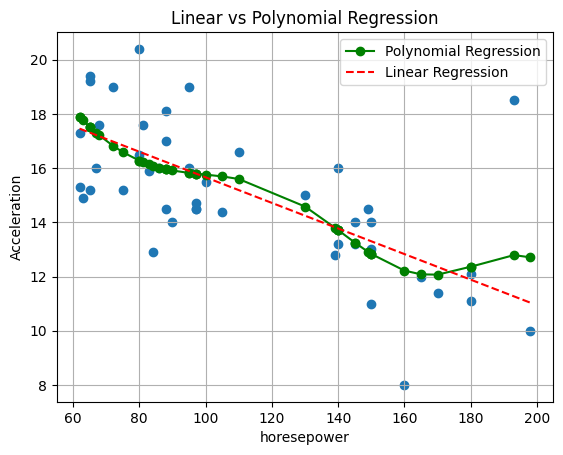

In [ ]:
#affichage de nuage + regression simple + polymial de horesepower

import matplotlib.pyplot as plt

# Affichage de la régression polynomiale
new_x_poly, new_y_poly = zip(*sorted(zip(x_test["horesepower"], ypred_horesepower)))
plt.plot(new_x_poly, new_y_poly, "o-", color="g", label="Polynomial Regression")

# Affichage de la régression linéaire
new_x_linear, new_y_linear = zip(*sorted(zip(x_test["horesepower"], ypred_linear_horsepower)))
plt.plot(new_x_linear, new_y_linear, "--", color="r", label="Linear Regression")

# Affichage des données réelles
plt.scatter(x_test["horesepower"], y_test)

# Paramètres du graphe
plt.xlabel("horesepower")
plt.ylabel("Acceleration")
plt.title("Linear vs Polynomial Regression")

# Légende et grille
plt.legend()
plt.grid()

# Affichage du graphe
plt.show()
